<a href="https://colab.research.google.com/github/SunFlowerLemma/DeepLearningWorkouts/blob/master/Multi%20Layer%20Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multilayer Perceptron

In [61]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [62]:
X_train.shape
X_train.dtype

dtype('uint8')

In [63]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.
X_train.dtype

dtype('float64')

In [64]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [65]:
class_names[y_train[10]]

'T-shirt/top'

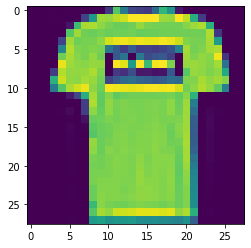

'T-shirt/top'

In [66]:
from matplotlib import pyplot as plt
plt.imshow(X_train[1], interpolation='none')
plt.show()
class_names[y_train[1]]

In [67]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [68]:
model.summary()
model.layers

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [69]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [70]:
weights, biases = hidden1.get_weights()

In [71]:
weights

array([[ 0.00048111,  0.02360567,  0.03520302, ..., -0.04506433,
         0.03081354, -0.06532715],
       [ 0.02202412, -0.03439302,  0.0450969 , ...,  0.03905276,
         0.06780158, -0.03336086],
       [ 0.00517364,  0.0442564 , -0.05066972, ..., -0.00671929,
        -0.07183056,  0.06071714],
       ...,
       [-0.01096568, -0.00568026, -0.00721024, ..., -0.06432647,
        -0.01367133, -0.07367061],
       [-0.04695036,  0.07296766,  0.03492356, ...,  0.02487165,
         0.06899957,  0.07168218],
       [-0.02534846, -0.04071096, -0.04735304, ..., -0.00737906,
         0.0100183 ,  0.00132637]], dtype=float32)

In [72]:
weights.shape

(784, 300)

In [73]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [74]:
biases.shape

(300,)

In [75]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [76]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7147 - accuracy: 0.7634 - val_loss: 0.5089 - val_accuracy: 0.8254
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4883 - accuracy: 0.8294 - val_loss: 0.4632 - val_accuracy: 0.8338
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4411 - accuracy: 0.8455 - val_loss: 0.4228 - val_accuracy: 0.8514
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4159 - accuracy: 0.8553 - val_loss: 0.3990 - val_accuracy: 0.8574
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3953 - accuracy: 0.8614 - val_loss: 0.3915 - val_accuracy: 0.8598
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3788 - accuracy: 0.8672 - val_loss: 0.4002 - val_accuracy: 0.8618
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3666 - accuracy: 0.8696 - val_loss: 0.3742 - val_accuracy

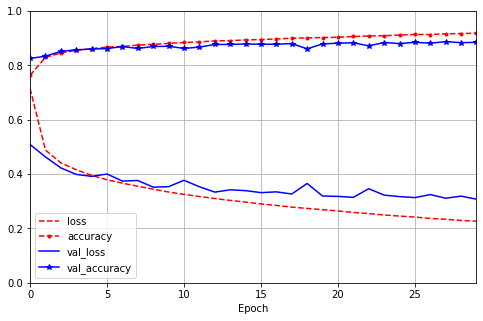

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [78]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3194 - accuracy: 0.8860


[0.31937891244888306, 0.8859999775886536]

In [81]:
model.save("my_keras_model", save_format="tf")


In [83]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
